# importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,PowerTransformer
from sklearn.metrics import accuracy_score,classification_report

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from scipy.stats import zscore

import warnings
warnings.filterwarnings("ignore")


# Loading dataset

In [2]:
data = pd.read_csv(r"C:\Users\acer\Desktop\micro credit card\Data file.csv")
data

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


As per above observation there are 209593 rows and  37 columns 

# checking Null values

In [3]:
data.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

As per above observation there is no missing values in the dataset

# Dropping useless column

In [4]:
data = data.drop('Unnamed: 0',axis=1)

In [5]:
data = data.drop('pcircle',axis=1)

In [6]:
data

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,2016-06-17
209589,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,2016-06-12
209590,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,2016-07-29
209591,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,...,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,2016-07-25


# checking data type

In [7]:
data.dtypes

label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

In [8]:
data.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pdate'],
      dtype='object')

# converting "pdate" column into datetime format

In [9]:
data['pdate']=pd.to_datetime(data['pdate'])

In [10]:
data.dtypes

label                            int64
msisdn                          object
aon                            float64
daily_decr30                   float64
daily_decr90                   float64
rental30                       float64
rental90                       float64
last_rech_date_ma              float64
last_rech_date_da              float64
last_rech_amt_ma                 int64
cnt_ma_rech30                    int64
fr_ma_rech30                   float64
sumamnt_ma_rech30              float64
medianamnt_ma_rech30           float64
medianmarechprebal30           float64
cnt_ma_rech90                    int64
fr_ma_rech90                     int64
sumamnt_ma_rech90                int64
medianamnt_ma_rech90           float64
medianmarechprebal90           float64
cnt_da_rech30                  float64
fr_da_rech30                   float64
cnt_da_rech90                    int64
fr_da_rech90                     int64
cnt_loans30                      int64
amnt_loans30             

In [11]:
data['Month']= data['pdate'].dt.month

In [12]:
data['Day']= data['pdate'].dt.day

In [13]:
data['Year']= data['pdate'].dt.year

In [14]:
data = data.drop('pdate',axis=1)

In [15]:
data

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month,Day,Year
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,0.0,2.0,12,6,0.0,29.000000,29.000000,7,20,2016
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,0.0,1.0,12,12,0.0,0.000000,0.000000,8,10,2016
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,0.0,1.0,6,6,0.0,0.000000,0.000000,8,19,2016
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6,2016
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,0.0,7.0,42,6,0.0,2.333333,2.333333,6,22,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,0.0,2.0,12,6,0.0,1.000000,1.000000,6,17,2016
209589,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,0.0,3.0,18,6,0.0,1.000000,1.000000,6,12,2016
209590,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,0.0,6.0,54,12,0.0,4.000000,3.833333,7,29,2016
209591,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,...,0.0,3.0,24,12,0.0,0.000000,10.500000,7,25,2016


In [16]:
data=data.drop('Year',axis=1)

In [17]:
data

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month,Day
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,7,20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,8,10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,8,19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,6,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,6,17
209589,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,6,12
209590,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,7,29
209591,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,7,25


In [18]:
# dropping "msisdn" column
data = data.drop('msisdn',axis=1)

In [19]:
data.dtypes

label                     int64
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback3

# EDA

1    183431
0     26162
Name: label, dtype: int64

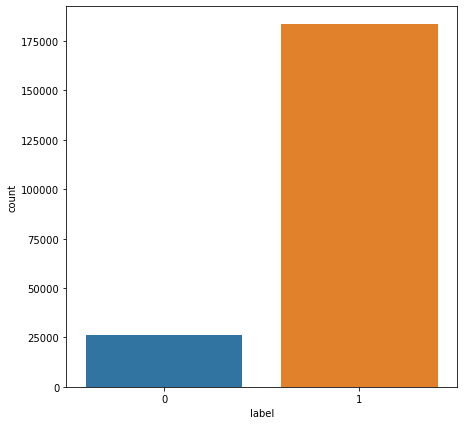

In [20]:
plt.figure(figsize=(7,7))
sns.countplot(x='label',data=data)
data['label'].value_counts()

As per above observation, 1 = 183431 users paid back the credit amount within 5 days of issuing the loan however 0 = 26162 users did not pay back the credit amount within 5 days of issuing the loan

# daily_decr30 vs label

<AxesSubplot:xlabel='label', ylabel='daily_decr30'>

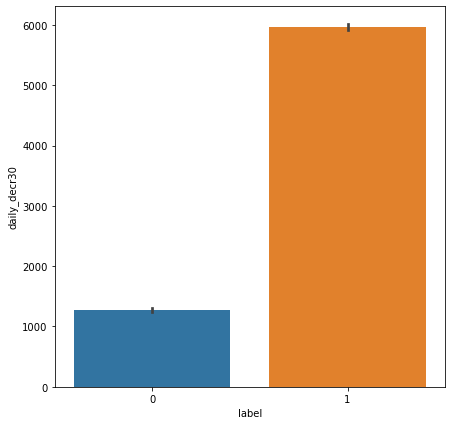

In [21]:
plt.figure(figsize=(7,7))
sns.barplot(x='label',y='daily_decr30',data=data)

As per above observation, Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah) for 1 = 6000 however Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah) for 0 = approx 1300

# daily_decr90  vs label

<AxesSubplot:xlabel='label', ylabel='daily_decr90'>

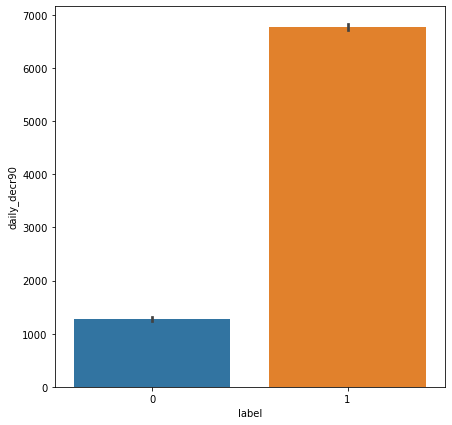

In [22]:
plt.figure(figsize=(7,7))
sns.barplot(x='label',y='daily_decr90',data=data)

As per above observation, Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah) for 1 = approx 7000 however Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah) for 0 = approx 1300 

# rental30  vs  label

<AxesSubplot:xlabel='label', ylabel='rental30'>

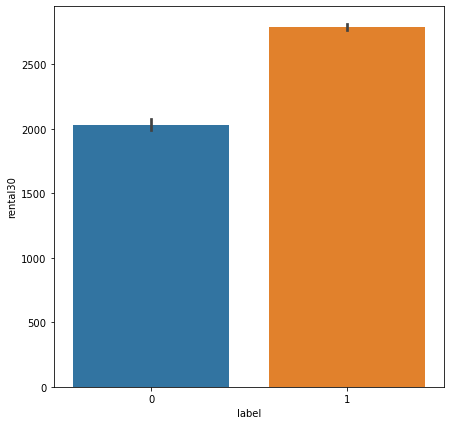

In [23]:
plt.figure(figsize=(7,7))
sns.barplot(x='label',y='rental30',data=data)

As per above observation, 1 has approx 3000 Average main account balance over last 30 days however 0 has 2000 Average main account balance over last 30 days

# rental90 vs label

<AxesSubplot:xlabel='label', ylabel='rental90'>

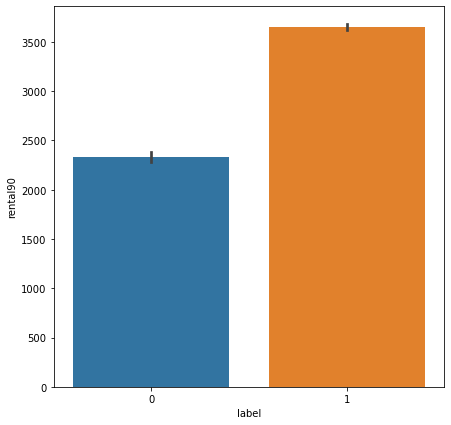

In [24]:
plt.figure(figsize=(7,7))
sns.barplot(x='label',y='rental90',data=data)

As per above observation, 1 has more than 3500 Average main account balance over last 90 days however  0 has approx 2500 Average main account balance over last 90 days

# last_rech_date_ma   vs     label

<AxesSubplot:xlabel='label', ylabel='last_rech_date_ma'>

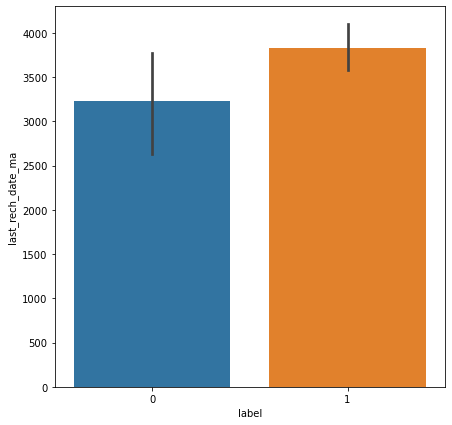

In [25]:
plt.figure(figsize=(7,7))
sns.barplot(x='label',y='last_rech_date_ma',data=data)

As per above observation, Number of days till last recharge of main account for 0 = 3200 however Number of days till last recharge of main account for 1 = 3800

# last_rech_date_da vs label

<AxesSubplot:xlabel='label', ylabel='last_rech_date_da'>

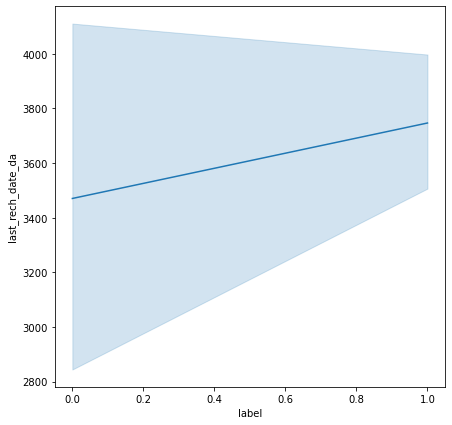

In [26]:
plt.figure(figsize=(7,7))
sns.lineplot(x='label',y='last_rech_date_da',data=data)

As per above observation, Number of days till last recharge of data account for 0 = 3500 however Number of days till last recharge of data account for 1 = approx 3800

# last_rech_amt_ma vs label

<AxesSubplot:xlabel='label', ylabel='last_rech_amt_ma'>

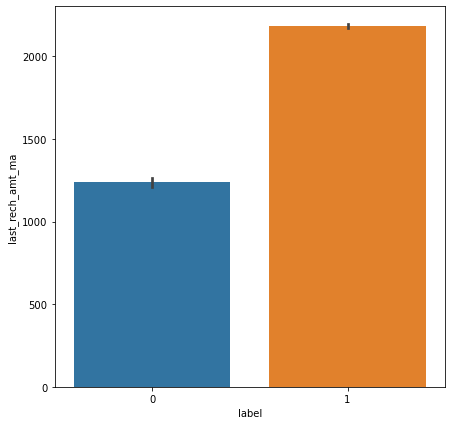

In [27]:
plt.figure(figsize=(7,7))
sns.barplot(x='label',y='last_rech_amt_ma',data=data)

As per above observation, Amount of last recharge of main account (in Indonesian Rupiah) for 0 = 1300 and for 1 = approx 2500

# cnt_ma_rech30 vs  label

<AxesSubplot:xlabel='label', ylabel='cnt_ma_rech30'>

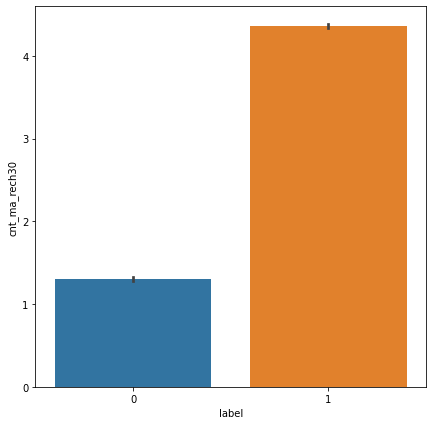

In [28]:
plt.figure(figsize=(7,7))
sns.barplot(x='label',y='cnt_ma_rech30',data=data)

As per above observation, Number of times main account got recharged in last 30 days for 0 = more than 1  and for 1 = more than 4

# sumamnt_ma_rech30  vs label

<AxesSubplot:xlabel='label', ylabel='sumamnt_ma_rech30'>

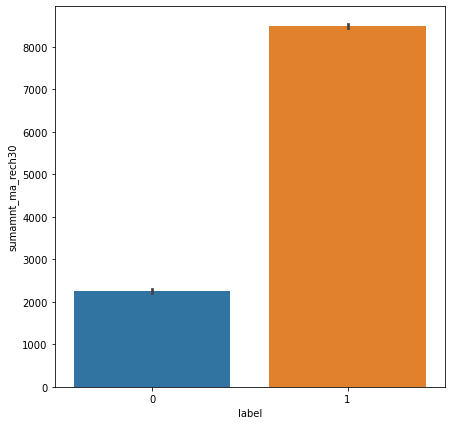

In [29]:
plt.figure(figsize=(7,7))
sns.barplot(x='label',y='sumamnt_ma_rech30',data=data)

As per above observation, Total amount of recharge in main account over last 30 days (in Indonesian Rupiah) for 0 = more than 2000 and for 1 = more than 8000

# cnt_loans30 vs label

<AxesSubplot:xlabel='label', ylabel='cnt_loans30'>

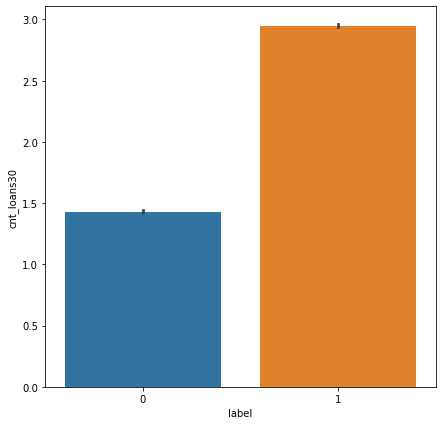

In [30]:
plt.figure(figsize=(7,7))
sns.barplot(x='label',y='cnt_loans30',data=data)

As per above observation, Number of loans taken by user in last 30 days for 0 = 1.4 and for 1 = 3

# cnt_loans90 vs label

<AxesSubplot:xlabel='label', ylabel='cnt_loans90'>

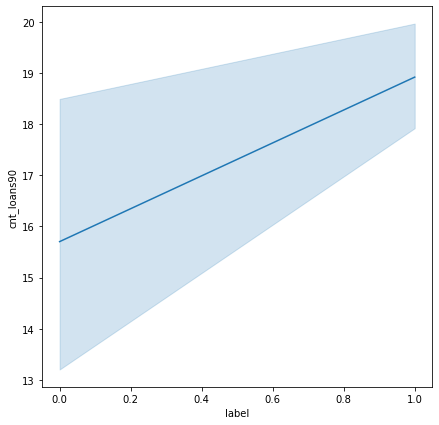

In [31]:
plt.figure(figsize=(7,7))
sns.lineplot(x='label',y='cnt_loans90',data=data)

As per above observation, Number of loans taken by user in last 90 days for 0 = approx 16 times and for 1 = 19 times

# amnt_loans30 vs label

<AxesSubplot:xlabel='label', ylabel='amnt_loans30'>

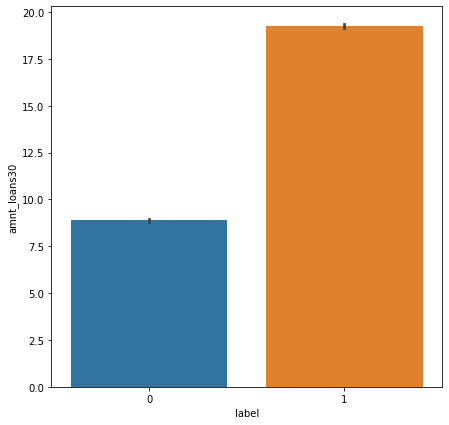

In [32]:
plt.figure(figsize=(7,7))
sns.barplot(x='label',y='amnt_loans30',data=data)

As per above observation, Total amount of loans taken by user in last 30 days for 0 = approx 10 and for 1 = approx 20

# amnt_loans90 vs label

<AxesSubplot:xlabel='label', ylabel='amnt_loans90'>

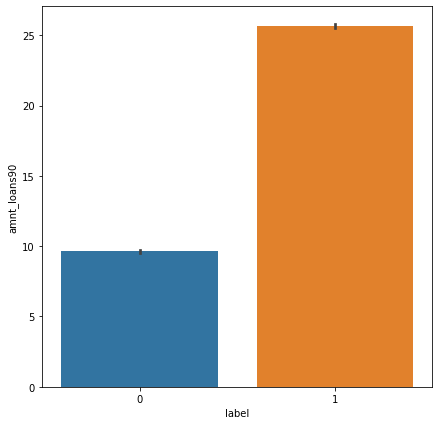

In [33]:
plt.figure(figsize=(7,7))
sns.barplot(x='label',y='amnt_loans90',data=data)

As per above observation, Total amount of loans taken by user in last 90 days for 0 = 10 and for 1 =  25

# maxamnt_loans30 vs label

<AxesSubplot:xlabel='label', ylabel='maxamnt_loans30'>

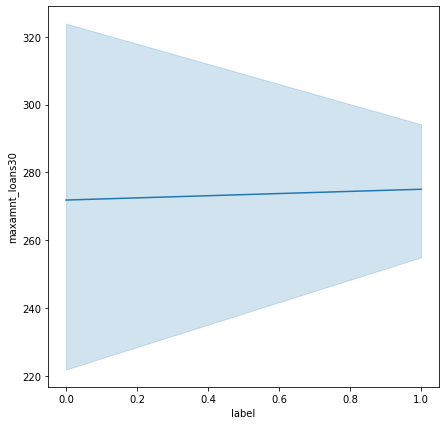

In [34]:
plt.figure(figsize=(7,7))
sns.lineplot(x='label',y='maxamnt_loans30',data=data)

As per above observation, maximum amount of loan taken by the user in last 30 days for 0 & 1 = 270

# maxamnt_loans90 vs label

<AxesSubplot:xlabel='label', ylabel='maxamnt_loans90'>

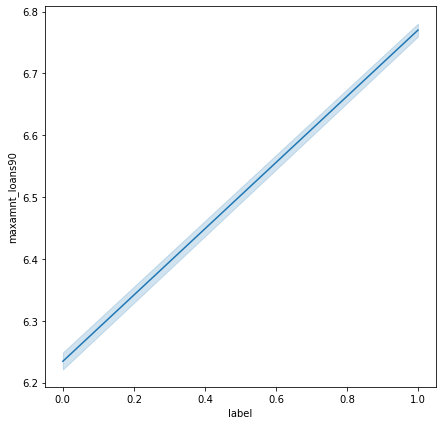

In [35]:
plt.figure(figsize=(7,7))
sns.lineplot(x='label',y='maxamnt_loans90',data=data)

As per above observation, maximum amount of loan taken by the user in last 90 days for 0 = 6.2 and for 1 = 6.8

# payback30 vs label

<AxesSubplot:xlabel='label', ylabel='payback30'>

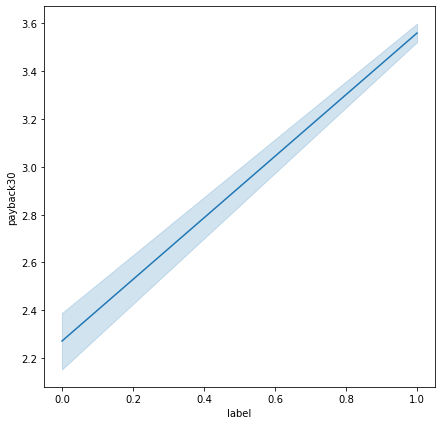

In [36]:
plt.figure(figsize=(7,7))
sns.lineplot(x='label',y='payback30',data=data)

As per above observation, Average payback time in days over last 30 days for 0 = 2.2 and for 1 = 3.6

# payback90 vs label

<AxesSubplot:xlabel='label', ylabel='payback90'>

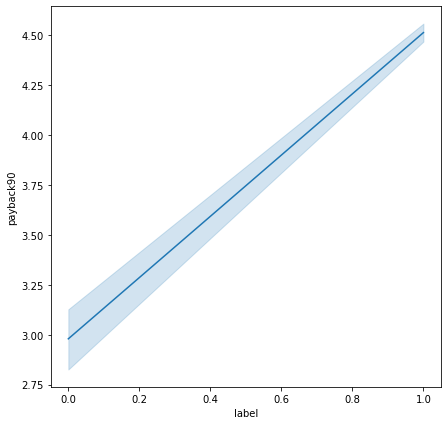

In [37]:
plt.figure(figsize=(7,7))
sns.lineplot(x='label',y='payback90',data=data)

As per above observation, Average payback time in days over last 90 days for 0 = 3 and for 1 = 4.5

# checking correlation

In [38]:
data.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month,Day
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,...,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183,0.154949,0.006825
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,...,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203,-0.001863,0.000662
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,...,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175,0.518664,0.006477
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,...,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800,0.539410,-0.021508
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,...,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147,0.365699,0.036537
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,...,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501,0.429407,0.008941
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,...,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583,-0.001207,0.000560
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,...,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417,-0.001800,0.000631
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,...,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260,0.096919,0.028883
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,...,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362,0.156148,0.068643


<AxesSubplot:>

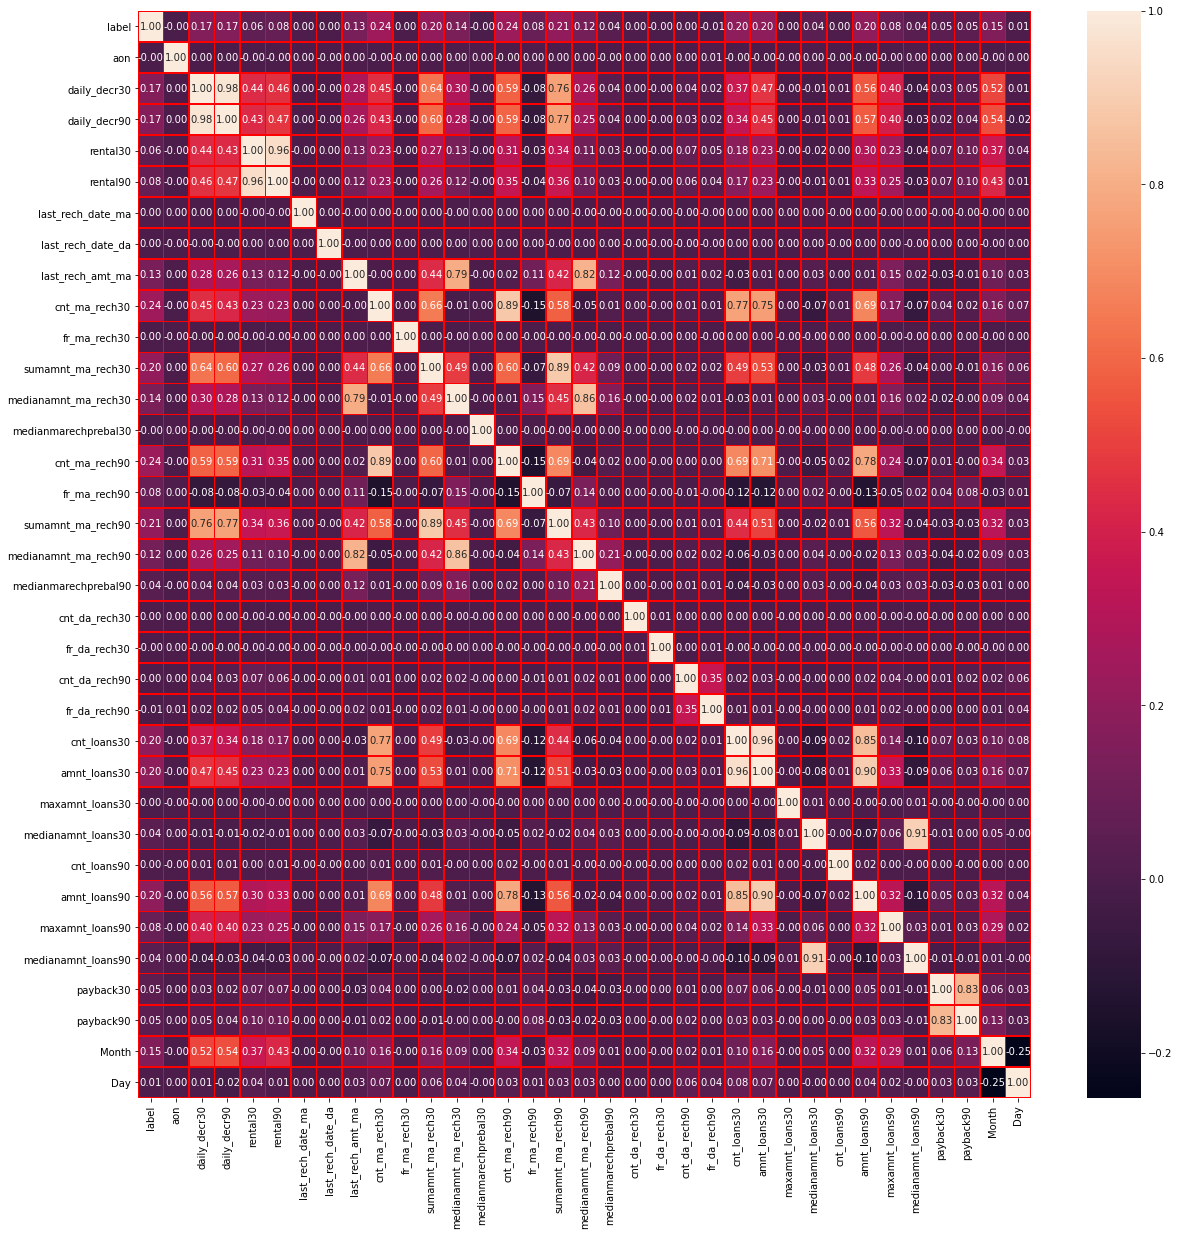

In [39]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,linewidths=0.6,linecolor='r',fmt='.2f')

aon has  0% negative correlation with Target column.

daily_decr30 has  17% positive correlation with Target column.

daily_decr90 has  17% positive correlation with Target column.

rental30 has  6% positive correlation with Target column.

rental90 has  8% positive correlation with Target column.

last_rech_date_ma has  0% positive correlation with Target column.

last_rech_date_da has 0 % positive correlation with Target column.

last_rech_amt_ma has  13% positive correlation with Target column.

cnt_ma_rech30 has 24 % positive correlation with Target column.

fr_ma_rech30 has  0% positive correlation with Target column.

sumamnt_ma_rech30 has  20% positive correlation with Target column.

medianamnt_ma_rech30 has  14% positive correlation with Target column.

medianmarechprebal30 has 0% negative correlation with Target column.

cnt_ma_rech90 has  24% positive correlation with Target column.

fr_ma_rech90 has 8% positive correlation with Target column. 

sumamnt_ma_rech90  has  21% positive correlation with Target column.

medianamnt_ma_rech90 has  12% positive correlation with Target column.

medianmarechprebal90 has  4 % positive correlation with Target column.

cnt_da_rech30 has 0% positive correlation with Target column.

fr_da_rech30 has   0% negative correlation with Target column.

cnt_da_rech90 has  0% positive correlation with Target column.

fr_da_rech90 has  1% negative correlation with Target column.

cnt_loans30 has  20% negative correlation with Target column.

amnt_loans30 has  20% positive correlation with Target column.

maxamnt_loans30 has  0% positive correlation with Target column.

medianamnt_loans30 has  4% positive correlation with Target column.

cnt_loans90 has  0% positive correlation with Target column.

amnt_loans90 has  20 % positive correlation with Target column.

maxamnt_loans90 has 8% positive correlation with Target column.

medianamnt_loans90 has  4% positive correlation with Target column.

payback30 has  5% positive correlation with Target column.

payback90 has  5% positive correlation with Target column.

Month has  15% positive correlation with Target column.

Day  has  1% positive correlation with Target column. 

In [40]:
data.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'Month', 'Day'],
      dtype='object')

# Checking Outliers

<AxesSubplot:>

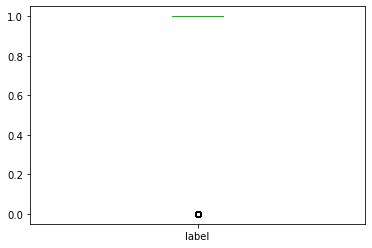

In [41]:
data['label'].plot.box()

As per above observation there is an outliers.

<AxesSubplot:>

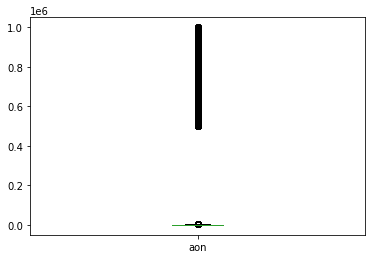

In [42]:
data['aon'].plot.box()

As per above observation there is an outliers.

<AxesSubplot:>

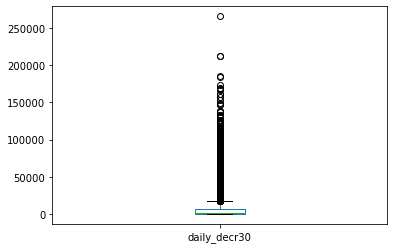

In [43]:
data['daily_decr30'].plot.box()

As per above observation there is an outliers.

<AxesSubplot:>

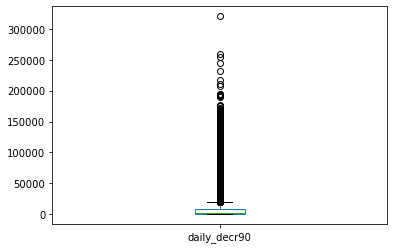

In [44]:
data['daily_decr90'].plot.box()

As per above observation there is an outliers.

<AxesSubplot:>

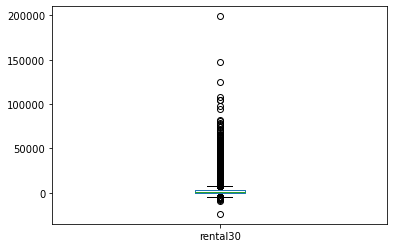

In [45]:
data['rental30'].plot.box()

As per above observation there is an outliers.

<AxesSubplot:>

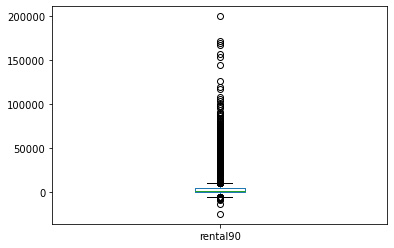

In [46]:
data['rental90'].plot.box()

As per above observation there is an outliers.

<AxesSubplot:>

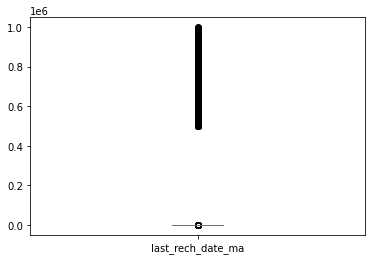

In [47]:
data['last_rech_date_ma'].plot.box()

As per above observation there is an outliers.

<AxesSubplot:>

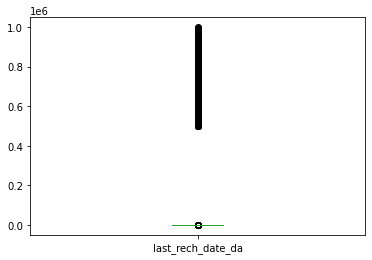

In [48]:
data['last_rech_date_da'].plot.box()

As per above observation there is an outliers.

<AxesSubplot:>

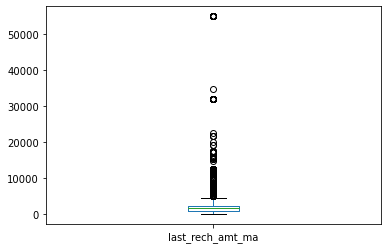

In [49]:
data['last_rech_amt_ma'].plot.box()

As per above observation there is an outliers.

<AxesSubplot:>

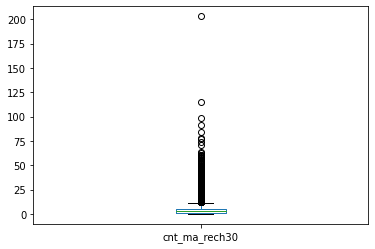

In [50]:
data['cnt_ma_rech30'].plot.box()

As per above observation there is an outliers.

<AxesSubplot:>

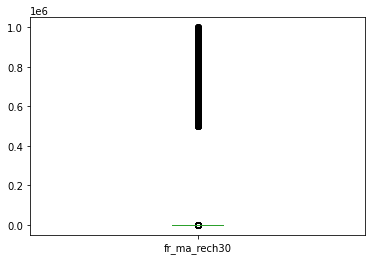

In [51]:
data['fr_ma_rech30'].plot.box()

As per above observation there is an outliers.

<AxesSubplot:>

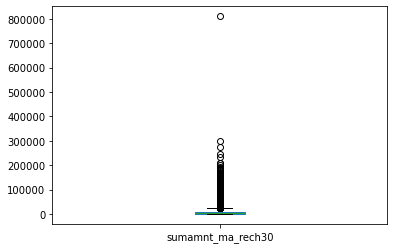

In [52]:
data['sumamnt_ma_rech30'].plot.box()

As per above observation there is an outliers.

<AxesSubplot:>

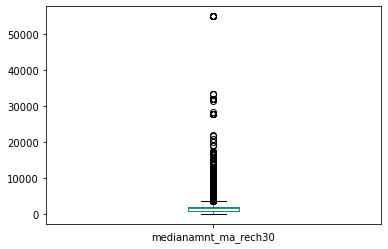

In [53]:
data['medianamnt_ma_rech30'].plot.box()

As per above observation there is an outliers.

<AxesSubplot:>

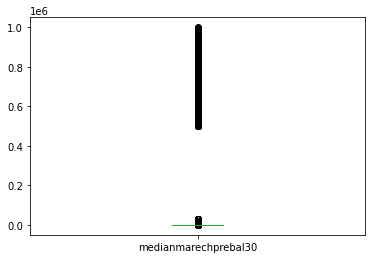

In [54]:
data['medianmarechprebal30'].plot.box()

As per above observation there is an outliers.

<AxesSubplot:>

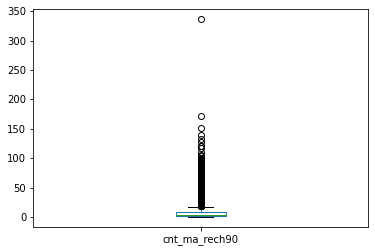

In [55]:
data['cnt_ma_rech90'].plot.box()

As per above observation there is an outliers.

<AxesSubplot:>

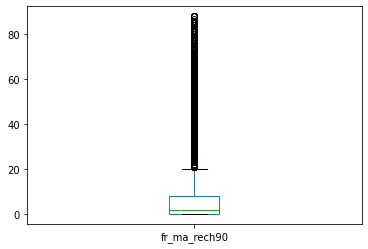

In [56]:
data['fr_ma_rech90'].plot.box()

As per above observation there is an outliers.

<AxesSubplot:>

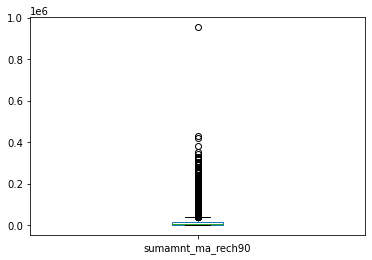

In [57]:
data['sumamnt_ma_rech90'].plot.box()

As per above observation there is an outliers.

<AxesSubplot:>

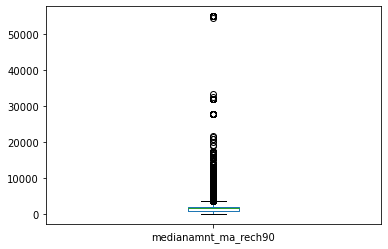

In [58]:
data['medianamnt_ma_rech90'].plot.box()

As per above observation there is an outliers.

<AxesSubplot:>

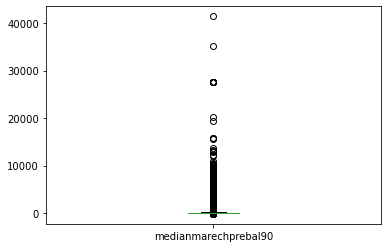

In [59]:
data['medianmarechprebal90'].plot.box()

As per above observation there is an outliers.

<AxesSubplot:>

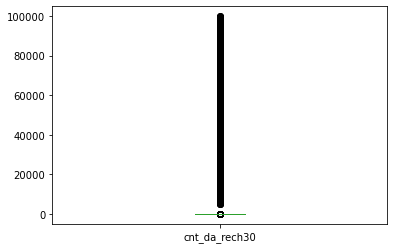

In [60]:
data['cnt_da_rech30'].plot.box()

As per above observation there is an outliers.

<AxesSubplot:>

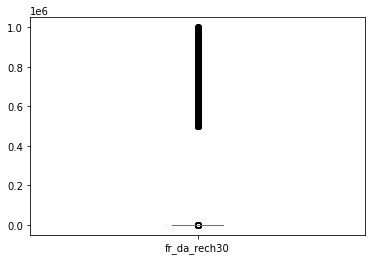

In [61]:
data['fr_da_rech30'].plot.box()

As per above observation there is an outliers.

<AxesSubplot:>

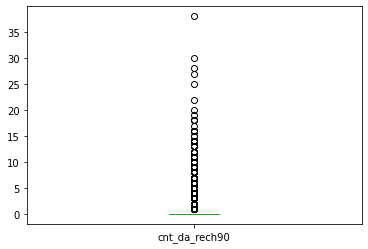

In [62]:
data['cnt_da_rech90'].plot.box()

As per above observation there is an outliers.

<AxesSubplot:>

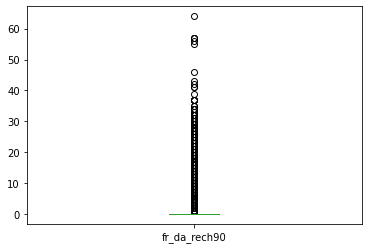

In [63]:
data['fr_da_rech90'].plot.box()

As per above observation there is an outliers.

<AxesSubplot:>

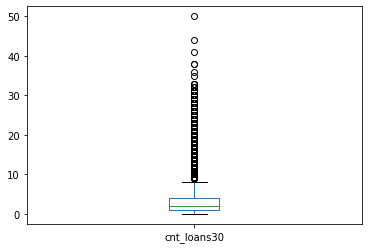

In [64]:
data['cnt_loans30'].plot.box()

As per above observation there is an outliers.

<AxesSubplot:>

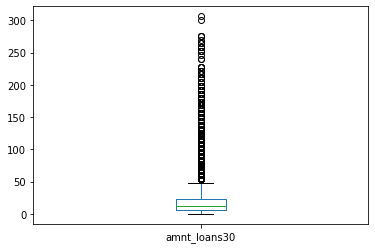

In [65]:
data['amnt_loans30'].plot.box()

As per above observation there is an outliers.

<AxesSubplot:>

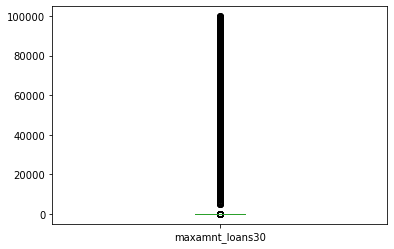

In [66]:
data['maxamnt_loans30'].plot.box()

As per above observation there is an outliers.

<AxesSubplot:>

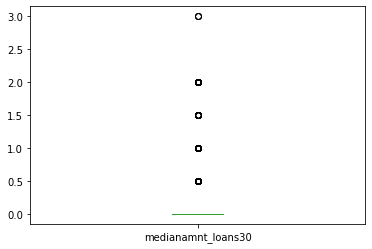

In [67]:
data['medianamnt_loans30'].plot.box()

As per above observation there is an outliers.

<AxesSubplot:>

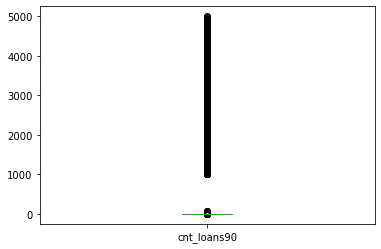

In [68]:
data['cnt_loans90'].plot.box()

As per above observation there is an outliers.

<AxesSubplot:>

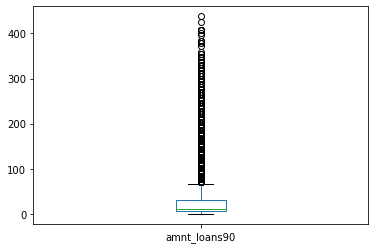

In [69]:
data['amnt_loans90'].plot.box()

As per above observation there is an outliers.

<AxesSubplot:>

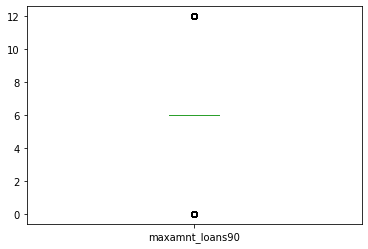

In [70]:
data['maxamnt_loans90'].plot.box()

As per above observation there is an outliers.

<AxesSubplot:>

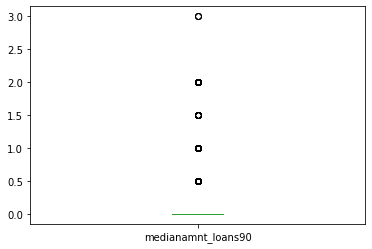

In [71]:
data['medianamnt_loans90'].plot.box()

As per above observation there is an outliers.

<AxesSubplot:>

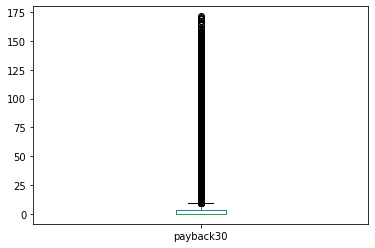

In [72]:
data['payback30'].plot.box()

As per above observation there is an outliers.

<AxesSubplot:>

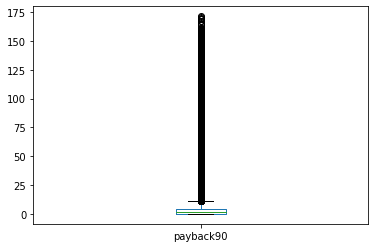

In [73]:
data['payback90'].plot.box()

As per above observation there is an outliers.

<AxesSubplot:>

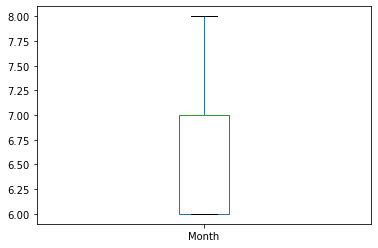

In [74]:
data['Month'].plot.box()

As per above observation there is no outliers.

<AxesSubplot:>

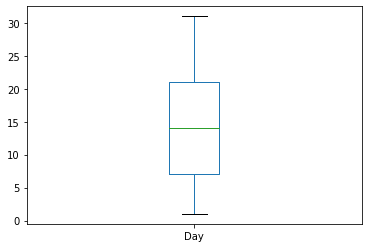

In [75]:
data['Day'].plot.box()

As per above observation there is no outliers.

# Checking skewness

In [76]:
data.skew()

label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

Findings skewed data from above observation are mentioned below:
    
aon    ---------                 10.392949

daily_decr30    ---------         3.946230

daily_decr90 ---------            4.252565

rental30   ---------              4.521929

rental90  ---------               4.437681

last_rech_date_ma ---------      14.790974

last_rech_date_da ---------      14.814857

last_rech_amt_ma  ---------       3.781149

cnt_ma_rech30  ---------          3.283842

fr_ma_rech30   ---------         14.772833

sumamnt_ma_rech30  ---------      6.386787

medianamnt_ma_rech30 ---------    3.512324

medianmarechprebal30 ---------   14.779875

cnt_ma_rech90  ---------          3.425254

fr_ma_rech90    ---------         2.285423

sumamnt_ma_rech90  ---------      4.897950

medianamnt_ma_rech90 ---------    3.752706

medianmarechprebal90 ---------   44.880503

cnt_da_rech30  ---------         17.818364

fr_da_rech30 ---------           14.776430

cnt_da_rech90  ---------         27.267278

fr_da_rech90  ---------          28.988083

cnt_loans30  ---------            2.713421

amnt_loans30   ---------          2.975719

maxamnt_loans30  ---------       17.658052

medianamnt_loans30  ---------     4.551043

cnt_loans90     ---------        16.594408

amnt_loans90   ---------          3.150006

maxamnt_loans90  ---------        1.678304

medianamnt_loans90  ---------     4.895720

payback30   ---------             8.310695

payback90     ---------           6.899951    

# checking Normal distribution

# Normal distribution : mean = mode = median

In [77]:
data.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month,Day
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,6.797321,14.39894
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,0.741435,8.43890
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.00000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,6.000000,7.00000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,7.000000,14.00000
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,7.000000,21.00000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,8.000000,31.00000


<AxesSubplot:xlabel='aon', ylabel='Density'>

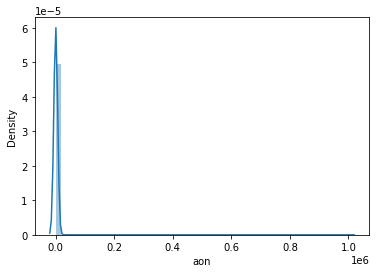

In [78]:
sns.distplot(data['aon'])

As per above observation,Normal distribution shows that data is skewed.

<AxesSubplot:xlabel='daily_decr30', ylabel='Density'>

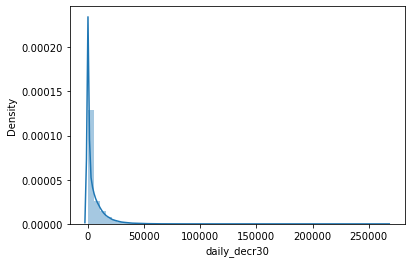

In [79]:
sns.distplot(data['daily_decr30'])

As per above observation,Normal distribution shows that data is skewed.

<AxesSubplot:xlabel='daily_decr90', ylabel='Density'>

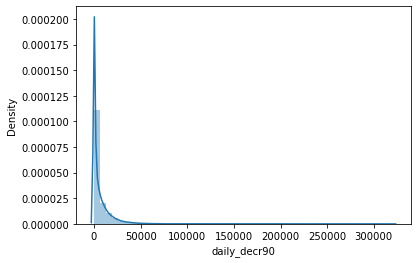

In [80]:
sns.distplot(data['daily_decr90'])

As per above observation,Normal distribution shows that data is skewed.

<AxesSubplot:xlabel='rental30', ylabel='Density'>

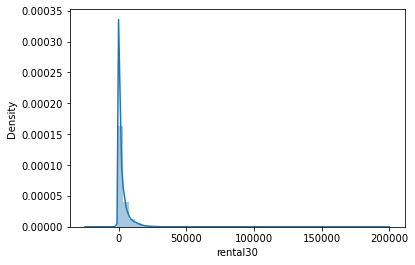

In [81]:
sns.distplot(data['rental30'])

As per above observation,Normal distribution shows that data is skewed.

<AxesSubplot:xlabel='rental90', ylabel='Density'>

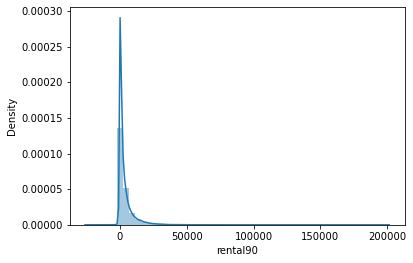

In [82]:
sns.distplot(data['rental90'])

As per above observation,Normal distribution shows that data is skewed.

<AxesSubplot:xlabel='last_rech_date_ma', ylabel='Density'>

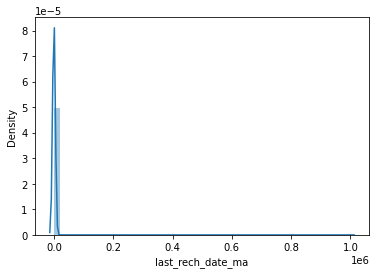

In [83]:
sns.distplot(data['last_rech_date_ma'])

As per above observation,Normal distribution shows that data is skewed.

<AxesSubplot:xlabel='last_rech_date_da', ylabel='Density'>

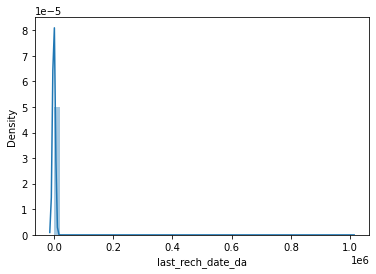

In [84]:
sns.distplot(data['last_rech_date_da'])

As per above observation,Normal distribution shows that data is skewed.

<AxesSubplot:xlabel='last_rech_amt_ma', ylabel='Density'>

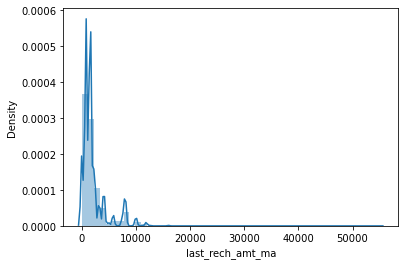

In [85]:
sns.distplot(data['last_rech_amt_ma'])

As per above observation,Normal distribution shows that data is skewed.

<AxesSubplot:xlabel='cnt_ma_rech30', ylabel='Density'>

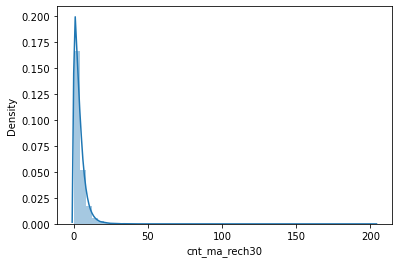

In [86]:
sns.distplot(data['cnt_ma_rech30'])

As per above observation,Normal distribution shows that data is skewed.

<AxesSubplot:xlabel='fr_ma_rech30', ylabel='Density'>

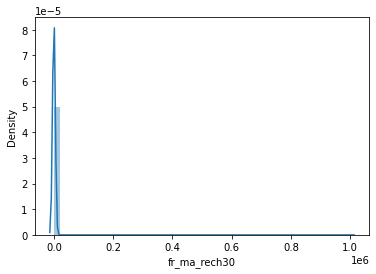

In [87]:
sns.distplot(data['fr_ma_rech30'])

As per above observation,Normal distribution shows that data is skewed.

<AxesSubplot:xlabel='sumamnt_ma_rech30', ylabel='Density'>

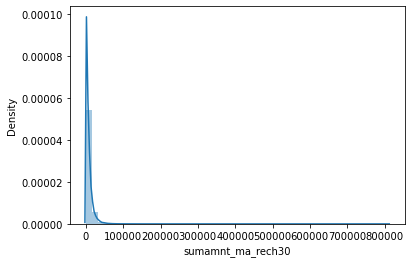

In [88]:
sns.distplot(data['sumamnt_ma_rech30'])

As per above observation,Normal distribution shows that data is skewed.

<AxesSubplot:xlabel='medianamnt_ma_rech30', ylabel='Density'>

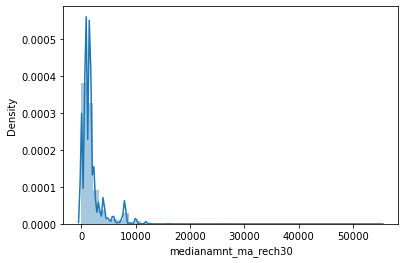

In [89]:
sns.distplot(data['medianamnt_ma_rech30'])

As per above observation,Normal distribution shows that data is skewed.

<AxesSubplot:xlabel='medianmarechprebal30', ylabel='Density'>

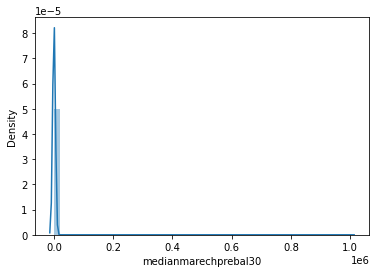

In [90]:
sns.distplot(data['medianmarechprebal30'])

As per above observation,Normal distribution shows that data is skewed.

<AxesSubplot:xlabel='cnt_ma_rech90', ylabel='Density'>

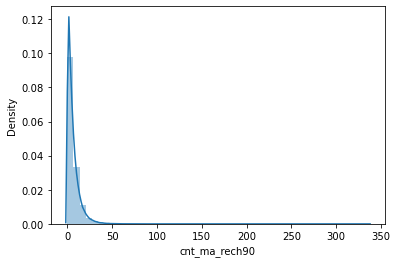

In [91]:
sns.distplot(data['cnt_ma_rech90'])

As per above observation,Normal distribution shows that data is skewed.

<AxesSubplot:xlabel='fr_ma_rech90', ylabel='Density'>

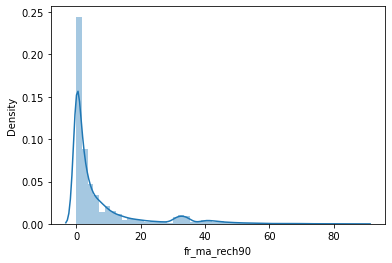

In [92]:
sns.distplot(data['fr_ma_rech90'])

As per above observation,Normal distribution shows that data is skewed.

<AxesSubplot:xlabel='sumamnt_ma_rech90', ylabel='Density'>

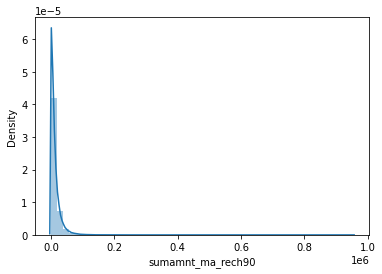

In [93]:
sns.distplot(data['sumamnt_ma_rech90'])

As per above observation,Normal distribution shows that data is skewed.

<AxesSubplot:xlabel='medianamnt_ma_rech90', ylabel='Density'>

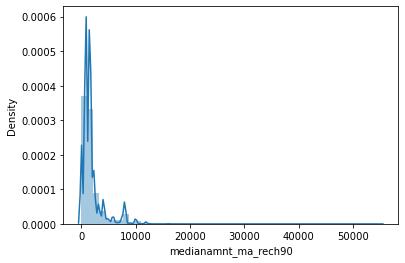

In [94]:
sns.distplot(data['medianamnt_ma_rech90'])

As per above observation,Normal distribution shows that data is skewed.

<AxesSubplot:xlabel='medianmarechprebal90', ylabel='Density'>

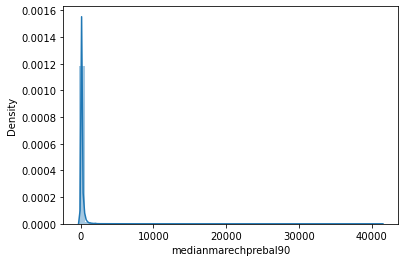

In [95]:
sns.distplot(data['medianmarechprebal90'])

As per above observation,Normal distribution shows that data is skewed.

<AxesSubplot:xlabel='cnt_da_rech30', ylabel='Density'>

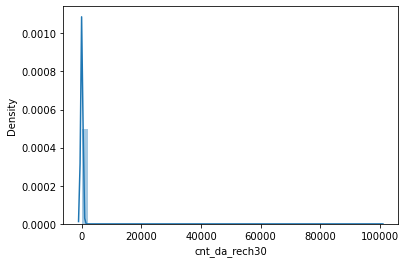

In [96]:
sns.distplot(data['cnt_da_rech30'])

As per above observation,Normal distribution shows that data is skewed.

<AxesSubplot:xlabel='fr_da_rech30', ylabel='Density'>

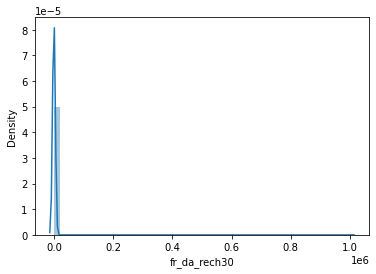

In [97]:
sns.distplot(data['fr_da_rech30'])

As per above observation,Normal distribution shows that data is skewed.

<AxesSubplot:xlabel='cnt_da_rech90', ylabel='Density'>

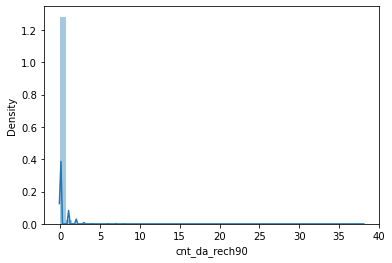

In [98]:
sns.distplot(data['cnt_da_rech90'])

As per above observation,Normal distribution shows that data is skewed.

<AxesSubplot:xlabel='fr_da_rech90', ylabel='Density'>

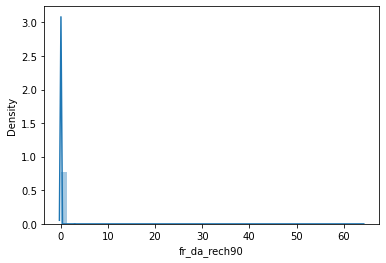

In [99]:
sns.distplot(data['fr_da_rech90'])

As per above observation,Normal distribution shows that data is skewed.

<AxesSubplot:xlabel='cnt_loans30', ylabel='Density'>

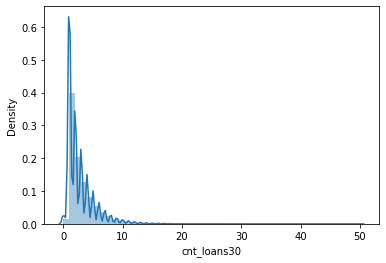

In [100]:
sns.distplot(data['cnt_loans30'])

As per above observation,Normal distribution shows that data is skewed.

<AxesSubplot:xlabel='amnt_loans30', ylabel='Density'>

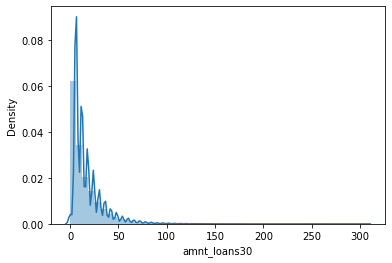

In [101]:
sns.distplot(data['amnt_loans30'])

As per above observation,Normal distribution shows that data is skewed.

<AxesSubplot:xlabel='maxamnt_loans30', ylabel='Density'>

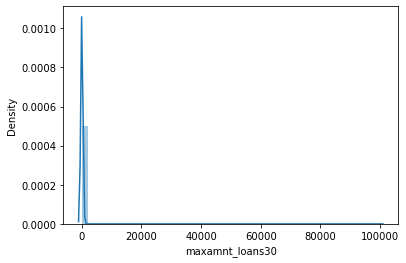

In [102]:
sns.distplot(data['maxamnt_loans30'])

As per above observation,Normal distribution shows that data is skewed.

<AxesSubplot:xlabel='medianamnt_loans30', ylabel='Density'>

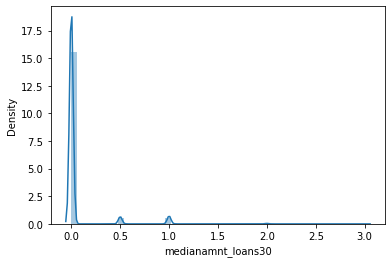

In [103]:
sns.distplot(data['medianamnt_loans30'])

As per above observation,Normal distribution shows that data is skewed.

<AxesSubplot:xlabel='cnt_loans90', ylabel='Density'>

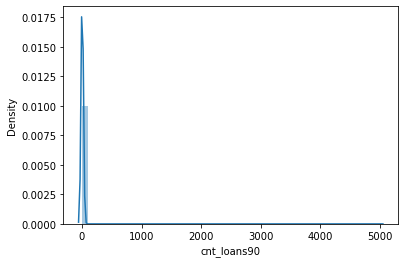

In [104]:
sns.distplot(data['cnt_loans90'])

As per above observation,Normal distribution shows that data is skewed.

<AxesSubplot:xlabel='amnt_loans90', ylabel='Density'>

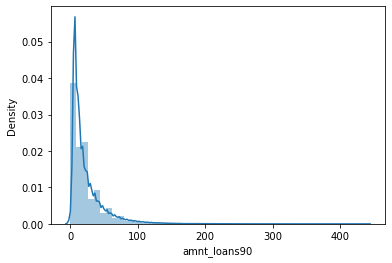

In [105]:
sns.distplot(data['amnt_loans90'])

As per above observation,Normal distribution shows that data is skewed.

<AxesSubplot:xlabel='maxamnt_loans90', ylabel='Density'>

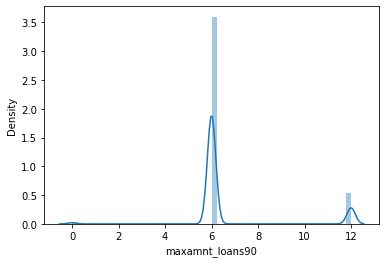

In [106]:
sns.distplot(data['maxamnt_loans90'])

As per above observation,Normal distribution shows that data is skewed.

<AxesSubplot:xlabel='medianamnt_loans90', ylabel='Density'>

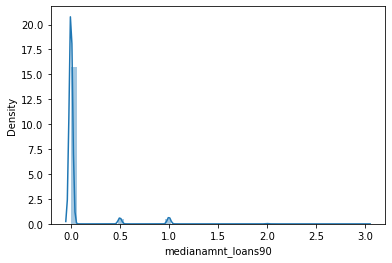

In [107]:
sns.distplot(data['medianamnt_loans90'])

As per above observation,Normal distribution shows that data is skewed.

<AxesSubplot:xlabel='payback30', ylabel='Density'>

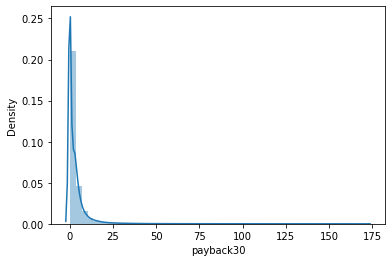

In [108]:
sns.distplot(data['payback30'])

As per above observation,Normal distribution shows that data is skewed.

<AxesSubplot:xlabel='payback90', ylabel='Density'>

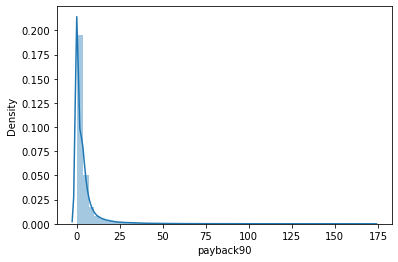

In [109]:
sns.distplot(data['payback90'])

As per above observation,Normal distribution shows that data is skewed.

<AxesSubplot:xlabel='Month', ylabel='Density'>

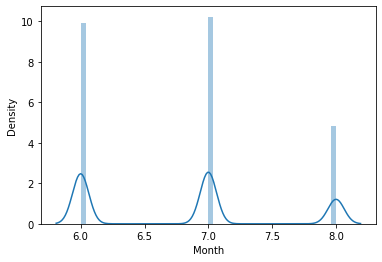

In [110]:
sns.distplot(data['Month'])

As per above observation,Normal distribution shows that data is not skewed.

<AxesSubplot:xlabel='Day', ylabel='Density'>

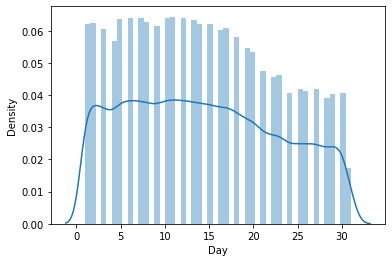

In [111]:
sns.distplot(data['Day'])

As per above observation,Normal distribution shows that data is not skewed.

# Outlier Removal

In [112]:
z = np.abs(zscore(data))
z.shape

(209593, 35)

# Using "np.where" function to check outlier points

In [113]:
threshold = 3
print(np.where(z>3))

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int32), array([15, 15, 32, ..., 28, 26, 30], dtype=int32))


# data in range(-3,3)

In [114]:
data_new = data[(z<3).all(axis=1)]
print(data.shape)
print(data_new.shape)

(209593, 35)
(161465, 35)


# % of data loss after removing outliers

In [115]:
loss = (209593-161465)/209593*100
print(loss)

22.962598941758554


As per above observation,losing almost 23% of data hence not removing outliers.

In [116]:
data

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month,Day
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,7,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,8,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,8,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,6,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,6,17
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,6,12
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,7,29
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,7,25


# dividing dataset into features and vector where x=features,y=vector

In [117]:
x = data.drop('label',axis=1)

In [118]:
y = data['label']

# Splitting dataset into train & test

In [119]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=41)

In [120]:
x_train

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month,Day
162345,242.00000,5230.537333,5286.030000,2189.76,2367.60,5.0,0.0,1539,4,8.0,...,6.0,0.0,3.0,18,6,0.0,0.000000,2.500000,7,26
166747,1286.00000,3846.209000,3868.330000,1114.99,1587.00,5.0,0.0,2309,3,10.0,...,6.0,0.0,4.0,24,6,0.0,5.000000,5.333333,7,11
98557,268.00000,11828.880000,11890.400000,-1000.65,-1341.17,1.0,0.0,770,10,0.0,...,6.0,0.0,8.0,48,6,0.0,2.857143,2.857143,7,4
26688,781.00000,18624.000000,20109.890000,21816.00,30144.54,2.0,0.0,1539,8,0.0,...,12.0,0.0,3.0,30,12,0.0,1.333333,1.333333,8,5
92110,493.00000,20.160000,20.160000,84.00,84.00,4.0,0.0,770,3,13.0,...,6.0,0.0,4.0,24,6,0.0,7.000000,7.000000,6,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53491,396.00000,9.358333,9.358333,455.95,455.95,7.0,0.0,777,1,0.0,...,6.0,0.0,2.0,12,6,0.0,3.000000,3.000000,6,5
106817,754827.54549,6393.196000,6468.660000,1269.65,1649.45,1.0,0.0,1539,8,5.0,...,6.0,0.0,5.0,30,6,0.0,4.250000,3.800000,7,12
61324,721.00000,0.375000,0.375000,3369.50,3369.50,0.0,0.0,0,0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,6,25
132003,136.00000,1561.100000,1561.500000,3640.14,3974.06,4.0,0.0,1539,1,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,7,8


In [121]:
x_test

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month,Day
184369,1644.0,22762.000000,35283.770,995.48,825.03,18.0,0.0,10000,3,7.0,...,12.0,0.0,2.0,18,12,0.0,0.000000,0.000000,8,8
18770,142.0,6.600000,6.600,18.27,18.27,11.0,0.0,773,1,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,6,9
755,811.0,17.595000,17.595,4972.83,4972.83,1.0,0.0,2309,1,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,6,23
111589,381.0,2398.253667,2415.090,-1479.87,-1530.90,5.0,0.0,8000,6,13.0,...,6.0,0.0,7.0,42,6,0.0,3.500000,14.285714,7,1
43484,1580.0,5630.674333,5640.010,414.83,449.83,2.0,0.0,4048,3,12.0,...,6.0,0.0,3.0,18,6,0.0,8.000000,8.000000,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167667,519.0,13180.000000,19467.950,3184.51,7109.27,5.0,0.0,1924,3,5.0,...,6.0,0.0,3.0,18,6,0.0,3.000000,6.000000,8,13
208674,377.0,3090.135333,3104.730,3488.39,4268.47,2.0,0.0,1539,4,4.0,...,6.0,0.0,3.0,18,6,0.0,18.000000,18.000000,7,8
133805,1352.0,5216.879000,5251.970,334.36,355.87,33.0,0.0,3178,0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,7,9
85354,658.0,7500.600000,7509.000,6564.30,7663.30,2.0,0.0,770,6,5.0,...,6.0,0.0,6.0,36,6,0.0,9.666667,9.666667,7,28


In [122]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [123]:
x_train

array([[-0.10416996, -0.01796303, -0.07395631, ..., -0.17724741,
         0.2726301 ,  1.37482599],
       [-0.09038898, -0.16698256, -0.20276772, ...,  0.09670784,
         0.2726301 , -0.40271163],
       [-0.10382675,  0.69233228,  0.52611294, ..., -0.14271524,
         0.2726301 , -1.23222919],
       ...,
       [-0.09784708, -0.5809771 , -0.55420788, ..., -0.41897263,
        -1.07543769,  1.25632348],
       [-0.10556917, -0.4129689 , -0.41236496, ..., -0.41897263,
         0.2726301 , -0.75821915],
       [-0.09333262, -0.56901132, -0.54410822, ..., -0.12890237,
        -1.07543769, -0.28420912]])

In [124]:
x_test

array([[-0.08566332,  1.86925567,  2.65162105, ..., -0.41897263,
         1.62069789, -0.75821915],
       [-0.10548997, -0.58030699, -0.55364228, ..., -0.41897263,
        -1.07543769, -0.63971665],
       [-0.09665906, -0.57912341, -0.55264328, ..., -0.41897263,
        -1.07543769,  1.01931847],
       ...,
       [-0.08951777, -0.01943331, -0.07705098, ..., -0.41897263,
         0.2726301 , -0.63971665],
       [-0.09867869,  0.22640362,  0.12802146, ...,  0.51569822,
         0.2726301 ,  1.61183101],
       [-0.10529197, -0.58101747, -0.55424195, ..., -0.41897263,
        -1.07543769, -1.4692342 ]])

# Logistic Regression

In [125]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pd = lr.predict(x_test)
print(classification_report(lr_pd,y_test))

              precision    recall  f1-score   support

           0       0.03      0.63      0.06       251
           1       1.00      0.88      0.93     41668

    accuracy                           0.88     41919
   macro avg       0.51      0.76      0.50     41919
weighted avg       0.99      0.88      0.93     41919



# decision tree classifier

In [126]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pd = dt.predict(x_test)
print(classification_report(dt_pd,y_test))

              precision    recall  f1-score   support

           0       0.56      0.53      0.54      5560
           1       0.93      0.94      0.93     36359

    accuracy                           0.88     41919
   macro avg       0.74      0.73      0.74     41919
weighted avg       0.88      0.88      0.88     41919



# Random Forest Classifier

In [127]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pd = rf.predict(x_test)
print(classification_report(rf_pd,y_test))

              precision    recall  f1-score   support

           0       0.52      0.78      0.62      3446
           1       0.98      0.93      0.96     38473

    accuracy                           0.92     41919
   macro avg       0.75      0.86      0.79     41919
weighted avg       0.94      0.92      0.93     41919



# Checking cross validation score

# Logistic Regression

In [128]:
print(cross_val_score(lr,x,y,cv=5).mean())

nan


# Decision Tree Classifier

In [129]:
print(cross_val_score(dt,x,y,cv=5).mean())

0.8836745486358326


# Random Forest Classifier

In [130]:
print(cross_val_score(rf,x,y,cv=5).mean())

0.9209992734403618


As per above observation Random Forest Classifier is doing good because the difference between accuracy_score and cross_val_score is lesser in comparison to other models.

# Hyper parameter Tuning

In [131]:
parameter = {'criterion':['gini','entropy'],
             'max_features':['auto','sqrt','log2'],
             'n_estimators':[100],
             'max_depth':np.arange(2,10)}

In [132]:
gsc =GridSearchCV(estimator=rf,param_grid=parameter,cv=5)

In [134]:
gsc.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100]})

# using best parameters to build the model

In [135]:
gsc.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [136]:
final_model = RandomForestClassifier(criterion='gini',max_features='sqrt',max_depth=9,n_estimators=100)
final_model.fit(x_train,y_train)
model = final_model.predict(x_test)
print(classification_report(model,y_test))

              precision    recall  f1-score   support

           0       0.35      0.86      0.50      2139
           1       0.99      0.91      0.95     39780

    accuracy                           0.91     41919
   macro avg       0.67      0.88      0.72     41919
weighted avg       0.96      0.91      0.93     41919



# saving the model

In [137]:
import joblib
joblib.dump(final_model,"Micro-Credit Defaulter Model")

['Micro-Credit Defaulter Model']